# Data augmentation

In [1]:
import util
import plotting
import augmentation

import numpy as np
import matplotlib.pyplot as plt
from skimage.color import label2rgb

from albumentations import Compose, Rotate, RandomRotate90, HorizontalFlip, Flip, ElasticTransform, GaussNoise, RandomCrop, Resize

## Define augmentation pipeline

'p' is the probability that the operation is performed

In [3]:
img_size = 128
crop_area_perc = 0.5
crop_size = int(crop_area_perc*img_size)
transform = Compose([Rotate(limit=5, p=0.5), 
                    RandomRotate90(p=0.5), 
                    HorizontalFlip(p=0.5),
                    Flip(p=0.5),
                    #ElasticTransform(sigma=10, alpha_affine=15, p=0.5),
                    RandomCrop(crop_size, crop_size, p=0.25), 
                    Resize(img_size, img_size)], 
                    additional_targets={'image': 'image', 'image0': 'image', 'mask':'mask', 'mask0': 'mask'})

#Noise will only be aplied to input_data
noise_transform = GaussNoise(var_limit=(50.0, 100.0), p=0.5)

## Load and augment data

### Example

In [4]:
base_dir = 'H:/Santi/'
data_path = base_dir+'Data/' 

indices = [3, 592]
optimal_sigma = util.load_pkl(data_path, 'optimal_sigma')
threshold = util.load_pkl(data_path, 'mean_intensity_threshold')

item_id = 0
s, t = optimal_sigma[item_id], threshold[item_id]

#Inputs
input_data = util.load_h5(data_path, 'Mito', indices)
print('Inputs'+':', input_data.shape)

#Outputs
output_data = util.load_h5(data_path, 'WatProc_s%.1f_t%.1f'%(s, t), indices)
print('Outputs:', output_data.shape)

#Labels
labels = util.load_h5(data_path, 'proc_labels_s%.1f_t%.1f'%(s, t), indices)
print('Outputs:', labels.shape)


Loading H:/Santi/Data/optimal_sigma

Loading H:/Santi/Data/mean_intensity_threshold

Loading H:/Santi/Data/Mito.h5
Converting to array
Inputs: (2, 128, 128)

Loading H:/Santi/Data/WatProc_s1.9_t3.5.h5
Converting to array
Outputs: (2, 128, 128)

Loading H:/Santi/Data/proc_labels_s1.9_t3.5.h5
Converting to array
Outputs: (2, 128, 128)


  0%|                                                                        | 0/2 [00:00<?, ?it/s]C:\Users\snrodrig\Documents\GitHub\MitoSplit-Net\mitosplit-net\preprocessing.py:114: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  labels = morphology.remove_small_objects(labels, 9) #Remove too small objects
100%|████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 86.92it/s]


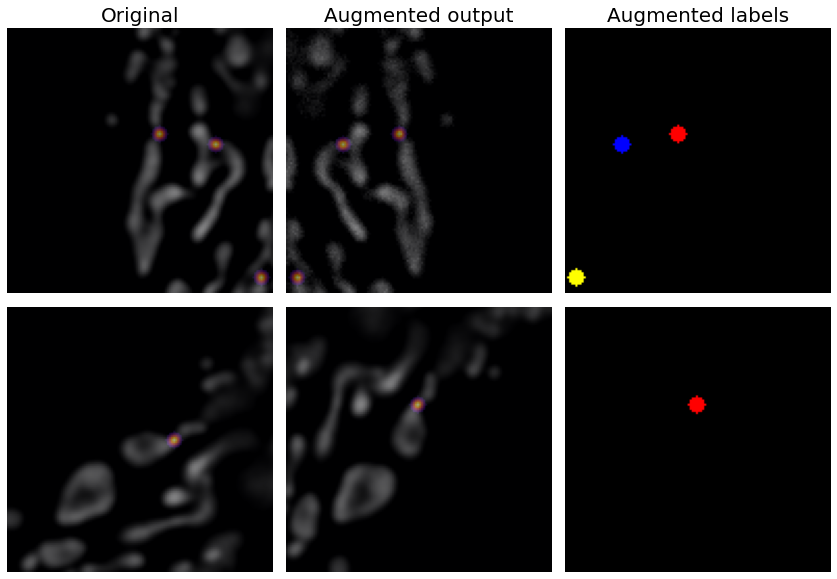

In [5]:
aug_input_data, aug_output_data, aug_labels = augmentation.augStack(input_data, output_data, labels, transform, noise_transform, sigma=s)

nb_img = input_data.shape[0]
title_size=20
width = 5

fig, axes = plt.subplots(nb_img, 3, figsize=(width*3, width*nb_img))
for frame in range(input_data.shape[0]):
  plotting.plot_merge(input_data[frame], output_data[frame], title='', ax=axes[frame, 0])
  plotting.plot_merge(aug_input_data[frame], aug_output_data[frame], title='', ax=axes[frame, 1])
  axes[frame, 2].imshow(label2rgb(aug_labels[frame], bg_label=0))
  axes[frame, 2].axis('off')
  
axes[0, 0].set_title('Original', size=title_size)
axes[0, 1].set_title('Augmented output', size=title_size)
axes[0, 2].set_title('Augmented labels', size=title_size)
fig.subplots_adjust(hspace=0.05, wspace=0)

### Generate augmented dataset

In [6]:
base_dir = 'H:/Santi/'
data_path = base_dir+'Data/'

#Inputs
input_data = util.load_h5(data_path, 'Mito')
print('Inputs'+':', input_data.shape)

optimal_sigma = util.load_pkl(data_path, 'optimal_sigma')
threshold = util.load_pkl(data_path, 'mean_intensity_threshold')

for s, t in zip(optimal_sigma, threshold):
  #Outputs
  output_data = util.load_h5(data_path, 'WatProc_s%.1f_t%.1f'%(s, t))
  print('Outputs:', output_data.shape)

  #Labels
  labels = util.load_h5(data_path, 'proc_labels_s%.1f_t%.1f'%(s, t))
  print('Outputs:', labels.shape)

  #Augment
  aug_input_data, aug_output_data, aug_labels = augmentation.augStack(input_data, output_data, labels, transform, noise_transform, sigma=s)

  util.save_h5(aug_input_data, data_path, 'aug2_Mito_s%.1f_t%.1f'%(s, t))
  util.save_h5(aug_output_data, data_path, 'aug2_WatProc_s%.1f_t%.1f'%(s, t))
  util.save_h5(aug_labels, data_path, 'aug2_labels_s%.1f_t%.1f'%(s, t))
  
  del output_data, labels, aug_input_data, aug_output_data, aug_labels


Loading H:/Santi/Data/Mito.h5
Converting to array
Inputs: (37000, 128, 128)

Loading H:/Santi/Data/optimal_sigma

Loading H:/Santi/Data/mean_intensity_threshold

Loading H:/Santi/Data/WatProc_s1.9_t3.5.h5
Converting to array
Outputs: (37000, 128, 128)

Loading H:/Santi/Data/proc_labels_s1.9_t3.5.h5
Converting to array
Outputs: (37000, 128, 128)


100%|███████████████████████████████████████████████████████| 37000/37000 [04:14<00:00, 145.63it/s]



Saving H:/Santi/Data/aug2_Mito_s1.9_t3.5.h5
Done.

Saving H:/Santi/Data/aug2_WatProc_s1.9_t3.5.h5
Done.

Saving H:/Santi/Data/aug2_labels_s1.9_t3.5.h5
Done.

Loading H:/Santi/Data/WatProc_s2.1_t11.3.h5
Converting to array
Outputs: (37000, 128, 128)

Loading H:/Santi/Data/proc_labels_s2.1_t11.3.h5
Converting to array
Outputs: (37000, 128, 128)


100%|███████████████████████████████████████████████████████| 37000/37000 [03:40<00:00, 167.88it/s]



Saving H:/Santi/Data/aug2_Mito_s2.1_t11.3.h5
Done.

Saving H:/Santi/Data/aug2_WatProc_s2.1_t11.3.h5
Done.

Saving H:/Santi/Data/aug2_labels_s2.1_t11.3.h5
Done.

Loading H:/Santi/Data/WatProc_s2.2_t16.0.h5
Converting to array
Outputs: (37000, 128, 128)

Loading H:/Santi/Data/proc_labels_s2.2_t16.0.h5
Converting to array
Outputs: (37000, 128, 128)


100%|███████████████████████████████████████████████████████| 37000/37000 [03:28<00:00, 177.21it/s]



Saving H:/Santi/Data/aug2_Mito_s2.2_t16.0.h5
Done.

Saving H:/Santi/Data/aug2_WatProc_s2.2_t16.0.h5
Done.

Saving H:/Santi/Data/aug2_labels_s2.2_t16.0.h5
Done.

Loading H:/Santi/Data/WatProc_s2.2_t19.1.h5
Converting to array
Outputs: (37000, 128, 128)

Loading H:/Santi/Data/proc_labels_s2.2_t19.1.h5
Converting to array
Outputs: (37000, 128, 128)


100%|███████████████████████████████████████████████████████| 37000/37000 [03:23<00:00, 182.00it/s]



Saving H:/Santi/Data/aug2_Mito_s2.2_t19.1.h5
Done.

Saving H:/Santi/Data/aug2_WatProc_s2.2_t19.1.h5
Done.

Saving H:/Santi/Data/aug2_labels_s2.2_t19.1.h5
Done.

Loading H:/Santi/Data/WatProc_s2.2_t22.2.h5
Converting to array
Outputs: (37000, 128, 128)

Loading H:/Santi/Data/proc_labels_s2.2_t22.2.h5
Converting to array
Outputs: (37000, 128, 128)


100%|███████████████████████████████████████████████████████| 37000/37000 [03:19<00:00, 185.34it/s]



Saving H:/Santi/Data/aug2_Mito_s2.2_t22.2.h5
Done.

Saving H:/Santi/Data/aug2_WatProc_s2.2_t22.2.h5
Done.

Saving H:/Santi/Data/aug2_labels_s2.2_t22.2.h5
Done.

Loading H:/Santi/Data/WatProc_s2.4_t34.6.h5
Converting to array
Outputs: (37000, 128, 128)

Loading H:/Santi/Data/proc_labels_s2.4_t34.6.h5
Converting to array
Outputs: (37000, 128, 128)


100%|███████████████████████████████████████████████████████| 37000/37000 [02:57<00:00, 208.61it/s]



Saving H:/Santi/Data/aug2_Mito_s2.4_t34.6.h5
Done.

Saving H:/Santi/Data/aug2_WatProc_s2.4_t34.6.h5
Done.

Saving H:/Santi/Data/aug2_labels_s2.4_t34.6.h5
Done.

Loading H:/Santi/Data/WatProc_s2.7_t50.1.h5
Converting to array
Outputs: (37000, 128, 128)

Loading H:/Santi/Data/proc_labels_s2.7_t50.1.h5
Converting to array
Outputs: (37000, 128, 128)


100%|███████████████████████████████████████████████████████| 37000/37000 [02:44<00:00, 224.94it/s]



Saving H:/Santi/Data/aug2_Mito_s2.7_t50.1.h5
Done.

Saving H:/Santi/Data/aug2_WatProc_s2.7_t50.1.h5
Done.

Saving H:/Santi/Data/aug2_labels_s2.7_t50.1.h5
Done.
